In [1]:
from regex import P

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px
import psycopg2
import requests
import pandas as pd
import plotly.express as px
from datetime import datetime, timedelta

from bs4 import BeautifulSoup

In [9]:
import time
import sqlite3
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options as FirefoxOptions
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [8]:
url  = 'https://www.aruodas.lt/butai/?FOwnerDbId0=1&FOwnerDbId2=1'
page = requests.get(url)
source = page.content

bs = BeautifulSoup(source, 'html.parser')

In [11]:
straipsniai = bs.find_all('div', {'class' :'title-row'})
print(straipsniai)

[]


In [116]:
opcijos = FirefoxOptions()
opcijos.add_argument('--incognito')
driver = webdriver.Firefox(options=opcijos)
url = 'https://www.aruodas.lt/butai-vilniuje-zirmunuose-riteriu-g-tik-ka-naujai-irengtas-kambariu-butas-1-3472873/'
driver.get(url)
time.sleep(5)
source = driver.page_source
driver.close()

In [117]:
bs = BeautifulSoup(source, 'html.parser')

In [37]:
sk = bs.find_all('div', {'class':'main filter-form'})
print(sk)

[<div class="main filter-form">
<div class="fb_reset" id="fb-root"><div style="position: absolute; top: -10000px; width: 0px; height: 0px;"><div></div></div></div>
<script>
        var fbloginUrl = 'https://www.facebook.com/v19.0/dialog/oauth?scope=email&state=31f0b65b488adf3df86047f96c2d1e79&response_type=code&approval_prompt=auto&redirect_uri=https%3A%2F%2Fwww.aruodas.lt%2Flogin%2Ffacebook%2F&client_id=170019113205043';

    function onfblogin(response) {
        window.location.href = fbloginUrl;
    }

    window.fbAsyncInit = function() {
        FB.init({
            appId      : 170019113205043,
            xfbml      : true,
            autoLogAppEvents : true,
            version    : 'v19.0'
        });

        var elem = document.getElementById('facebookShare');
        if (elem) {
            elem.addEventListener('click', function(e){
                FB.ui({
                    method: 'share',
                    href: elem.getAttribute('data-href')
                }, fu

In [58]:
bt = bs.find_all('div', {'class':'list-photo-v2'})

titles = []
links = []


for straipsnis in bt:
    # if not isinstance(straipsnis, int):
        linkt = straipsnis.find('a')
        imgt = straipsnis.find('img')

        # if linkt and imgt:
        link = linkt.get('href')
        title = imgt.get('alt')
        titles.append(title)
        links.append(link)

print(titles)
print(links)

df = pd.DataFrame({'Title': titles, 'Link': links})
print(df.head())


['Kauno r. sav., Vijūkų k., Plytupio g., 3 kambarių butas', 'Kauno r. sav., Užliedžių k., Pienių g., 3 kambarių butas', 'Kauno r. sav., Vijūkų k., Plytupio g., 3 kambarių butas', 'Druskininkų m., M. K. Čiurlionio g., 1 kambario butas', 'Vilnius, Naujamiestis, Birželio 23-iosios g., 2 kambarių butas', 'Šilutės m., Jaunimo al., 1 kambario butas', 'Šilutės m., Knygnešių g., 3 kambarių butas', 'Šilutės m., Geležinkelio g., 2 kambarių butas', 'Vilnius, Lazdynėliai, Lazdynėlių g., 3 kambarių butas', 'Vilnius, Žirmūnai, Žirmūnų g., 2 kambarių butas', 'Vilnius, Santariškės, Daujoto g., 3 kambarių butas', 'Vilnius, Jeruzalė, Rugių g., 3 kambarių butas', 'Klaipėda, Poilsis, Rambyno g., 1 kambario butas', 'Vilnius, Senamiestis, Aludarių g., 4 kambarių butas', 'Vilnius, Baltupiai, Baltupio g., 2 kambarių butas', 'Vilnius, Šnipiškės, Raitininkų g., 2 kambarių butas', 'Klaipėda, Centras, Baltikalnio g., 3 kambarių butas', 'Vilnius, Senamiestis, Naugarduko g., 1 kambario butas', 'Vilnius, Pilaitė, Ka

In [81]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options as FirefoxOptions
from bs4 import BeautifulSoup as BS
import pandas as pd
import time


options = FirefoxOptions()
options.add_argument('--incognito')
service = Service(r'C:\Users\Batia\Downloads\geckodriver-v0.34.0-win64\geckodriver.exe')
driver = webdriver.Firefox(service=service, options=options)




for i in range(1, 336):
    print(f"Scraping page {i}...")
    url = f'https://www.aruodas.lt/butai/puslapis/{i}/?FOwnerDbId0=1&FOwnerDbId2=1'
    driver.get(url)
    
    time.sleep(2)
    bs = BS(driver.page_source, 'html.parser')
# titles = []
# links = []


bt = bs.find_all('div', {'class':'list-photo-v2'})

titles = []
links = []


for straipsnis in bt:
    # if not isinstance(straipsnis, int):
        linkt = straipsnis.find('a')
        imgt = straipsnis.find('img')

        if linkt and imgt:
            link = linkt.get('href')
            title = imgt.get('alt')
            titles.append(title)
            links.append(link)

print(titles)
print(links)

df = pd.DataFrame({'Title': titles, 'Link': links})
print(df.head())
driver.quit()


# df = pd.DataFrame({'Titles': titles, 'Link': links})
# print(df.head())

df.to_csv('aruodas_listings2.csv', index=False)

print("Saved to aruodas_listings2.csv.")


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...


KeyboardInterrupt: 

In [103]:
titles = []
links = []


bt = bs.find_all('div', {'class':'list-photo-v2'})

for skelbimas in bt:
    
        linkt = skelbimas.find('a')
        imgt = skelbimas.find('img')
        link = linkt.get('href')
        title = imgt.get('alt')
        titles.append(title)
        links.append(link)
print(titles)
print(links)

['Alytus, Putinai, Kalniškės g., 1 kambario butas', 'Skuodo m., Vilniaus g., 3 kambarių butas', 'Mažeikių m., Sodų g., 1 kambario butas', 'Šakių m., E. Steponaičio g., 3 kambarių butas', 'Palanga, Palanga, Brukšvos g., 3 kambarių butas', 'Klaipėda, Senamiestis, Liepų g., 3 kambarių butas', 'Palanga, Šventoji, Audronašų g., 3 kambarių butas', 'Vilnius, Naujininkai, Darbininkų g., 2 kambarių butas', 'Trakų r. sav., Lentvario m., Klevų al., 2 kambarių butas', 'Klaipėda, Žvejybos uostas, Minijos g., 2 kambarių butas', 'Vilnius, Senamiestis, Sodų g., 1 kambario butas', 'Šiauliai, Lieporiai, Tilžės g., 1 kambario butas', 'Radviliškio r. sav., Baisogalos mstl., Grinkiškio g., 1 kambario butas', 'Vilniaus r. sav., Vaidotų k., Statybininkų g., 3 kambarių butas', 'Šilutės m., Turgaus g., 4 kambarių butas', 'Druskininkų m., Šiltnamių g., 3 kambarių butas', 'Vilnius, Naujoji Vilnia, Pramonės g., 1 kambario butas', 'Vilnius, Karoliniškės, Loretos Asanavičiūtės g., 2 kambarių butas', 'Šilutės m., Ti

In [106]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options as FirefoxOptions
from bs4 import BeautifulSoup as BS
import pandas as pd
import time

options = FirefoxOptions()
options.add_argument('--incognito')
# options.add_argument('--headless')

service = Service(r'C:\Users\Batia\Downloads\geckodriver-v0.34.0-win64\geckodriver.exe')
driver = webdriver.Firefox(service=service, options=options)


titles = []
links = []
print(links)

for i in range(1, 200):
    print(f"Scraping page {i}...")
    url = f'https://www.aruodas.lt/butai/puslapis/{i}/?FOwnerDbId0=1&FOwnerDbId2=1'
    driver.get(url)
    
    
    time.sleep(2)

    
    bs = BS(driver.page_source, 'html.parser')
    
    
    bt = bs.find_all('div', {'class':'list-photo-v2'})
    
    
    if not bt:
        print("No more pages. End.")
        break

    
    for skelbimas in bt:
        # if not isinstance(skelbimas, int):
            linkt = skelbimas.find('a')
            imgt = skelbimas.find('img')
            # if linkt and imgt:
            link = linkt.get('href')
            # print(link)
            title = imgt.get('alt')
            # print(title)
            titles.append(title)
            links.append(link)


driver.quit()


df = pd.DataFrame({'Titles': titles, 'Link': links})


df.to_csv('aruodas_listings1.csv', index=False)

print("Saved to aruodas_listings1.csv.")


[]
Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Scrapi

In [108]:
df = pd.read_csv('aruodas_listings1.csv')
print(df)

                                                 Titles  \
0       Vilnius, Žirmūnai, Riterių g., 2 kambarių butas   
1     Palanga, Palanga, A. Mickevičiaus g., 2 kambar...   
2     Vilnius, Pašilaičiai, Perkūnkiemio g., 3 kamba...   
3     Palanga, Palanga, Medvalakio g., 2 kambarių butas   
4     Palanga, Palanga, Medvalakio g., 1 kambario butas   
...                                                 ...   
4977  Vilnius, Bajorai, Paukščių Tako g., 2 kambarių...   
4978  Vilnius, Burbiškės, Burbiškių g., 2 kambarių b...   
4979        Vilnius, Rasos, Slėnio g., 6 kambarių butas   
4980   Vilnius, Naujininkai, Prūsų g., 5 kambarių butas   
4981  Klaipėda, Centras, Sausio 15-osios g., 2 kamba...   

                                                   Link  
0     https://www.aruodas.lt/butai-vilniuje-zirmunuo...  
1     https://www.aruodas.lt/butai-palangoje-palango...  
2     https://www.aruodas.lt/butai-vilniuje-pasilaic...  
3     https://www.aruodas.lt/butai-palangoje-palango...  
4

In [118]:
sk1 = bs.find('div', {'class':'main-content'})
print(sk1.prettify())

<div class="main-content">
 <div data-value="0" id="searchVersion" style="display:none">
 </div>
 <div class="info-message" id="infoMessage">
 </div>
 <div id="objToolbarDummy">
 </div>
 <div class="action-bar-advert" id="actionBarAdverts">
  <div class="project-popup-actions">
   <!--
-->
   <div class="advert-controls-href-back first action-button-js-hook" data-action="go_back_history" data-url="/" id="btGoToSearch">
    <a href="javascript:void(0);">
     <div class="control-icon control-icon-back">
     </div>
     <span class="control-title">
      Grįžti
     </span>
    </a>
   </div>
   <!--
-->
   <div class="advert-controls-container">
    <div class="advert-controls-no-link">
     <div class="control-icon project-share-title">
     </div>
     <span class="control-title">
      Dalintis
     </span>
     <span class="icon-triangle">
     </span>
    </div>
    <ul class="advert-controls__drop-down">
     <li class="advert-controls__drop-down-title">
      <div class="advert-

In [123]:
from bs4 import BeautifulSoup as BS
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options as FirefoxOptions
import sqlite3
import time


options = FirefoxOptions()
options.add_argument('--incognito')
# options.add_argument('--headless')  


service = Service(r'C:\Users\Batia\Downloads\geckodriver-v0.34.0-win64\geckodriver.exe')
driver = webdriver.Firefox(service=service, options=options)


titles = []
links = []


def scrape_links(base_url, pages):
    for i in range(1, pages+1):
        print(f"Scraping page {i}...")
        url = base_url.format(i)
        driver.get(url)
        
        time.sleep(2)  
        
        bs = BS(driver.page_source, 'html.parser')
        
        
        bt = bs.find_all('div', {'class':'list-photo-v2'})
        
        
        if not bt:
            print("No more pages. End.")
            break
        
        
        for skelbimas in bt:
            linkt = skelbimas.find('a')
            imgt = skelbimas.find('img')
            if linkt and imgt:
                link = linkt.get('href')
                title = imgt.get('alt')
                titles.append(title)
                links.append(link)


def scrape_listing(url):
    driver.get(url)
    time.sleep(2)
    
    bs = BS(driver.page_source, 'html.parser')
    
    address = bs.find('h1', class_='obj-header-text').text.strip()
    
    price = bs.find('span', class_='price-eur').text.strip()
    
    details = bs.find('dl', class_='obj-details')
    details_dict = {}

    keys = details.find_all('dt')
    values = details.find_all('dd')

    for key, value in zip(keys, values):
        key_text = key.text.strip().replace(':', '')  # Clean the text, remove colon
        span_value = value.find('span', class_='fieldValueContainer')
        
        # Check if span_value exists
        if span_value:
            value_text = span_value.text.strip()
        else:
            value_text = 'N/A'  # Assign a default value if the span is not found
        
        details_dict[key_text] = value_text

    # Extract individual fields from details_dict
    namo_numeris = details_dict.get('Namo numeris', 'N/A')
    buto_numeris = details_dict.get('Buto numeris', 'N/A')
    plotas = details_dict.get('Plotas', 'N/A')
    kambariu_sk = details_dict.get('Kambarių sk', 'N/A')
    aukstas = details_dict.get('Aukštas', 'N/A')
    aukstu_sk = details_dict.get('Aukštų sk', 'N/A')
    metai = details_dict.get('Metai', 'N/A')
    pastato_tipas = details_dict.get('Pastato tipas', 'N/A')
    sildymas = details_dict.get('Šildymas', 'N/A')
    irengimas = details_dict.get('Įrengimas', 'N/A')
    energijos_klase = details_dict.get('Pastato energijos suvartojimo klasė', 'N/A')

    
    listing_data = (
        address, price, namo_numeris, buto_numeris, plotas, kambariu_sk, aukstas,
        aukstu_sk, metai, pastato_tipas, sildymas, irengimas, energijos_klase
    )
    
    return listing_data


def insert_listing(conn, listing):
    cursor = conn.cursor()
    cursor.execute('''
        INSERT INTO listings (
            address, price, namo_numeris, buto_numeris, plotas, kambariu_sk,
            aukstas, aukstu_sk, metai, pastato_tipas, sildymas, irengimas, energijos_klase
        ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', listing)
    conn.commit()


def create_db():
    conn = sqlite3.connect('real_estate.db')
    cursor = conn.cursor()

    
    cursor.execute('''DROP TABLE IF EXISTS listings''')

    
    cursor.execute('''
        CREATE TABLE listings (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            address TEXT,
            price TEXT,
            namo_numeris TEXT,
            buto_numeris TEXT,
            plotas TEXT,
            kambariu_sk TEXT,
            aukstas TEXT,
            aukstu_sk TEXT,
            metai TEXT,
            pastato_tipas TEXT,
            sildymas TEXT,
            irengimas TEXT,
            energijos_klase TEXT
        )
    ''')

    conn.commit()
    conn.close()


def main():
    
    create_db()

    
    sale_url = 'https://www.aruodas.lt/butai/puslapis/{}/?FOwnerDbId0=1&FOwnerDbId2=1'
    rent_url = 'https://www.aruodas.lt/butu-nuoma/puslapis/{}/?FOwnerDbId0=1&FOwnerDbId2=1'

    # Scrape 200 pages
    scrape_links(sale_url, 200)
    scrape_links(rent_url, 130)

    
    conn = sqlite3.connect('real_estate.db')

    # Iterate over all scraped links and insert data into the database
    for link in links:
        listing_data = scrape_listing(link)
        insert_listing(conn, listing_data)
        print(f"Inserted listing: {listing_data[0]}")  

    
    conn.close()

    
    driver.quit()


if __name__ == "__main__":
    main()


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Scraping 

KeyboardInterrupt: 

In [122]:
import sqlite3
import requests
import time
import sys
from bs4 import BeautifulSoup as BS
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options as FirefoxOptions

# URLs for sale and rent listings
sale_url = 'https://www.aruodas.lt/butai/puslapis/{}/?FOwnerDbId0=1&FOwnerDbId2=1'
rent_url = 'https://www.aruodas.lt/butu-nuoma/puslapis/{}/?FOwnerDbId0=1&FOwnerDbId2=1'

# Database setup
def setup_database():
    conn = sqlite3.connect('aruodas.db')
    c = conn.cursor()
    c.execute('''
        CREATE TABLE IF NOT EXISTS listings (
            id INTEGER PRIMARY KEY,
            address TEXT,
            price TEXT,
            namo_numeris TEXT,
            buto_numeris TEXT,
            plotas TEXT,
            kambariu_sk INTEGER,
            aukstas INTEGER,
            aukstu_sk INTEGER,
            metai INTEGER,
            pastato_tipas TEXT,
            sildymas TEXT,
            irengimas TEXT,
            energijos_klase TEXT
        )
    ''')
    conn.commit()
    print("Database and table created successfully!")
    return conn

# Phase 1: Scrape listing URLs from aruodas.lt (for sale or rent)
def scrape_listing_urls(conn, page_limit, mode):
    driver = setup_selenium()
    urls = []
    url_template = sale_url if mode == "sale" else rent_url
    for i in range(1, page_limit + 1):
        print(f"Scraping page {i}...")
        url = url_template.format(i)
        driver.get(url)
        time.sleep(2)
        bs = BS(driver.page_source, 'html.parser')
        listings = bs.find_all('div', {'class': 'list-photo-v2'})
        
        if not listings:
            print("No more pages. End.")
            break

        for skelbimas in listings:
            link_element = skelbimas.find('a')
            if link_element:
                link = link_element.get('href')
                urls.append(link)
    
    driver.quit()
    return urls

# Phase 2: Scrape individual listing details from collected URLs
def scrape_listing_details(conn, urls):
    driver = setup_selenium()
    c = conn.cursor()

    for url in urls:
        print(f"Scraping details from {url}...")
        driver.get(url)
        time.sleep(2)
        bs = BS(driver.page_source, 'html.parser')
        
        # Extracting details
        address = bs.find('h1', class_='obj-header-text').text.strip()
        price = bs.find('span', class_='price-eur').text.strip()
        
        details_dict = extract_details(bs)

        # Insert data into SQLite database
        c.execute('''
            INSERT INTO listings (address, price, namo_numeris, buto_numeris, plotas, kambariu_sk, aukstas, aukstu_sk, metai, pastato_tipas, sildymas, irengimas, energijos_klase)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        ''', (address, price, details_dict.get('Namo numeris'), details_dict.get('Buto numeris'), 
              details_dict.get('Plotas'), details_dict.get('Kambarių sk.'), 
              details_dict.get('Aukštas'), details_dict.get('Aukštų sk.'), 
              details_dict.get('Metai'), details_dict.get('Pastato tipas'), 
              details_dict.get('Šildymas'), details_dict.get('Įrengimas'), 
              details_dict.get('Pastato energijos suvartojimo klasė')))

        conn.commit()

    driver.quit()

# Helper function to extract details
def extract_details(bs):
    details_dict = {}
    details_section = bs.find('dl', class_='obj-details')
    keys = details_section.find_all('dt')
    values = details_section.find_all('dd')

    for key, value in zip(keys, values):
        key_text = key.text.strip().replace(':', '')
        value_text = value.find('span', class_='fieldValueContainer').text.strip() if value else None
        details_dict[key_text] = value_text
    
    return details_dict

# Setup Selenium driver
def setup_selenium():
    options = FirefoxOptions()
    options.add_argument('--incognito')
    # Uncomment for headless mode
    # options.add_argument('--headless')
    
    service = Service(r'C:\path\to\geckodriver.exe')  # Update to your geckodriver path
    driver = webdriver.Firefox(service=service, options=options)
    return driver

# Command-line argument handling with improved validation
def main():
    if len(sys.argv) < 5:
        print("Usage: python scraper.py <start|continue> <number_of_pages> <number_of_urls> <sale|rent>")
        return

    operation = sys.argv[1]
    try:
        page_limit = int(sys.argv[2])
        url_limit = int(sys.argv[3])
    except ValueError:
        print("Error: <number_of_pages> and <number_of_urls> must be integers.")
        return

    mode = sys.argv[4]  # sale or rent
    if mode not in ['sale', 'rent']:
        print("Error: mode must be either 'sale' or 'rent'.")
        return

    conn = setup_database()

    if operation == "start":
        print("Starting fresh. Dropping old data and creating new tables.")
        conn.execute('DROP TABLE IF EXISTS listings')
        setup_database()
        urls = scrape_listing_urls(conn, page_limit, mode)
        scrape_listing_details(conn, urls[:url_limit])
    elif operation == "continue":
        print("Continuing from where we left off...")
        # Continue scraping from last point
        with open('scraping_log.txt', 'r') as log_file:
            last_page = int(log_file.read().strip())
        urls = scrape_listing_urls(conn, page_limit + last_page, mode)
        scrape_listing_details(conn, urls[:url_limit])
    else:
        print("Invalid operation. Use 'start' or 'continue'.")

    # Update the scraping log
    with open('scraping_log.txt', 'w') as log_file:
        log_file.write(str(page_limit))

    conn.close()

if __name__ == "__main__":
    main()


Usage: python scraper.py <start|continue> <number_of_pages> <number_of_urls> <sale|rent>


   id                                            address      price  \
0   1    Vilnius, Šnipiškės, Verkių g., 2 kambarių butas  205 000 €   
1   2          Palanga, Prieplaukos g., 2 kambarių butas  250 000 €   
2   3  Palanga, Palanga, A. Mickevičiaus g., 2 kambar...  268 000 €   
3   4  Vilnius, Pašilaičiai, Perkūnkiemio g., 3 kamba...  163 000 €   
4   5  Vilnius, Fabijoniškės, Vėtrungių g., 2 kambari...  131 000 €   

  namo_numeris buto_numeris    plotas  kambariu_sk  aukstas  aukstu_sk metai  \
0           5A           55  66,64 m²            2        3          5  2003   
1           14           11  49,36 m²            2        1          2  2020   
2          N/A          N/A     35 m²            2        1          3  2023   
3           53          N/A     67 m²            3        8         12  2008   
4           83          N/A     50 m²            2       12         12  2005   

  pastato_tipas                sildymas irengimas energijos_klase     City  \
0       Mūrini

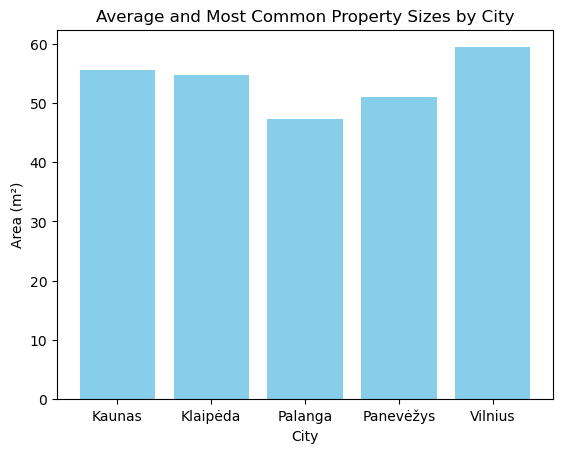

In [132]:
import sqlite3
import pandas as pd
import streamlit as st

conn = sqlite3.connect('aruodas.db')
df = pd.read_sql_query("SELECT * FROM listings", conn)
conn.close()
df = df.drop_duplicates()



df['City'] = df['address'].str.split(',').str[0]
df['plotasI'] = df['plotas'].replace('N/A', np.nan)
df['plotasI'] = df['plotasI'].str.replace(' m²', '').str.replace(',', '.').astype(float)
df['plotas_rounded'] = df['plotasI'].round(-1)

cities = ['Vilnius', 'Kaunas', 'Klaipėda', 'Palanga', 'Panevėžys']
df_f = df[df['City'].isin(cities)]

mean_area = df_f.groupby('City')['plotas_rounded'].mean().reset_index()

mode_area = df_f.groupby('City')['plotas_rounded'].agg(lambda x: x.mode()[0]).reset_index()

fig, ax = plt.subplots()


ax.bar(mean_area['City'], mean_area['plotas_rounded'], color='skyblue', label='Mean Area')


ax.set_xlabel('City')
ax.set_ylabel('Area (m²)')
ax.set_title('Average and Most Common Property Sizes by City')


# print(df.head())

st.pyplot(fig)


st.write('Mean Area by City:')
st.write(mean_area)

st.write('Most Common Area by City:')
st.write(mode_area)